In [14]:
import sys
sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
from scipy.integrate import nquad
from scipy.interpolate import interp1d
from scipy.special import erf
import matplotlib as mpl
import matplotlib.pylab as pylab
from cycler import cycler
import palettable

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from theory.units import *
from theory.spec_calc import PowerSpectra

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
params = {'text.usetex': True,
          'font.family': 'serif',
          'font.serif': ['CMU Serif'],
          'font.sans-serif': ['CMU Sans Serif'],
          'legend.fontsize': 17,
          'legend.fancybox': True,
          'legend.frameon': False,
          'legend.framealpha': 0.4,
          'legend.labelspacing': 0.5,
          'figure.figsize': (6.4/1.1, 4.8/1.1),
          'axes.labelsize': 19,
          'axes.titlesize':18,
          'axes.titlepad':10,
          'axes.linewidth':1.1,
          'axes.labelpad':10,
          'axes.prop_cycle': cycler('color', palettable.cartocolors.qualitative.Bold_10.hex_colors) + 
                            cycler(alpha=10*[.7]), 
          'lines.linewidth':2.5,
          'xtick.labelsize':18,
          'ytick.labelsize':18,
          'xtick.top':True,
          'ytick.right':True,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'xtick.major.size': 5,
          'xtick.minor.size': 2,
          'ytick.major.size': 5,
          'ytick.minor.size': 2,
          'xtick.major.width': 1,
          'ytick.major.width': 1,
          'xtick.minor.width': 0.8,
          'ytick.minor.width': 0.8,
         }
pylab.rcParams.update(params)

In [16]:
pspec = PowerSpectra(precompute=['NFW', 'Burk'])

In [17]:
plots_dir = "/Users/smsharma/Dropbox/Projects/LensPowerSpectra/LensPower/draft/plots/"

# Lens-induced power spectra for a uniform subhalo population
## Plotted as per-subhalo

In [18]:
l_min = 1
l_max = 500
n_l = 50
l_ary = np.logspace(np.log10(l_min), np.log10(l_max), n_l)

In [19]:
M0 = 10**8*M_s
R0 = pspec.R0_VL(M0)
Dl = 10*kpc
v = 1e-3

In [20]:
Cl_NFW_ary = np.array([pspec.Cl_NFW(M0, Dl, v, l) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_Burk_ary = np.array([pspec.Cl_Burk(M0, Dl, v, l) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_tNFW_ary = np.array([pspec.Cl_tNFW(M0, Dl, v, l, tau=15) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_tNFW2_ary = np.array([pspec.Cl_tNFW(M0, Dl, v, l, tau=10) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2

In [8]:
Cl_Plummer_ary = pspec.Cl_Plummer(R0, M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;
Cl_Gauss_ary = pspec.Cl_Gauss(R0, M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;
Cl_Point_ary = pspec.Cl_Point(M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;

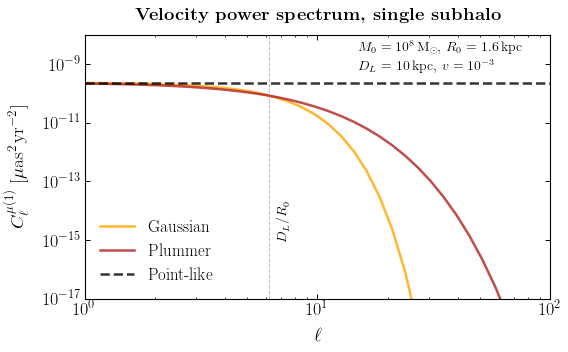

In [10]:
plt.figure(figsize=(8,5))

plt.plot(l_ary, Cl_Gauss_ary, label="Gaussian", alpha=0.8, c='orange')
plt.plot(l_ary, Cl_Plummer_ary, label="Plummer", alpha=0.8, color='firebrick')
plt.plot(l_ary, len(l_ary)*[Cl_Point_ary], label="Point-like", c='k', ls='--', alpha=0.8)

plt.axvline((1/(R0/Dl)), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(R0/Dl)) + .5,1e-15,'$D_L/R_0$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\mu (1)}$ [$\mu$as$^2$\,yr$^{-2}$]")


plt.xlim(l_min, 100)
plt.ylim(1e-17,1e-8)

plt.title('\\textbf{Velocity power spectrum, single subhalo}', fontsize=18.5, y=1.02)
plt.text(15, 2.3e-9,'$M_0 = 10^8\,$M$_\odot$, $R_0$ = ' + str(R0/kpc)[:3] + '\,kpc', fontsize=14)
plt.text(15, 5e-10,'$D_L$ = 10\,kpc, $v=10^{-3}$', fontsize=14)


plt.legend(frameon=False, loc='lower left')

plt.tight_layout()
plt.savefig(plots_dir + "mu_single_1.pdf")

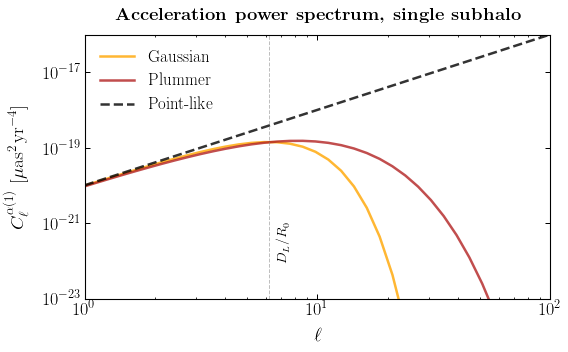

In [11]:
pref = (3/64)*l_ary**2/Dl**2/(1/Year**2)

plt.figure(figsize=(8,5))

plt.plot(l_ary, pref*Cl_Gauss_ary, label="Gaussian", alpha=0.8, c='orange')
plt.plot(l_ary, pref*Cl_Plummer_ary, label="Plummer", alpha=0.8, color='firebrick')
plt.plot(l_ary, pref*np.array(len(l_ary)*[Cl_Point_ary]), label="Point-like", c='k', ls='--', alpha=0.8)

plt.axvline((1/(R0/Dl)), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(R0/Dl)) + .5,1e-22,'$D_L/R_0$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\\alpha (1)}$ [$\mu$as$^2$\,yr$^{-4}$]")


plt.xlim(l_min, 100)
plt.ylim(1e-23,1e-16)

plt.title('\\textbf{Acceleration power spectrum, single subhalo}', fontsize=18.5, y=1.02)

plt.legend(frameon=False, loc='upper left')

plt.tight_layout()
plt.savefig(plots_dir + "alpha_single_1.pdf")

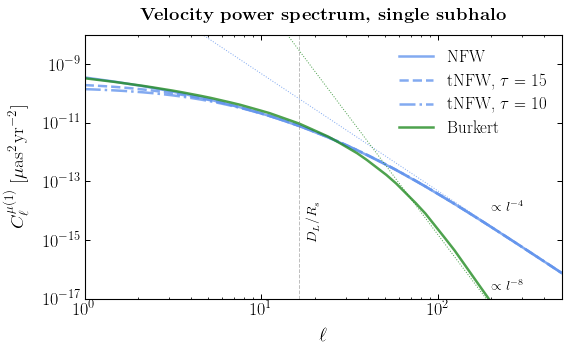

In [12]:
plt.figure(figsize=(8,5))

plt.plot(l_ary, Cl_NFW_ary, label="NFW", alpha=0.8, c='cornflowerblue')
plt.plot(l_ary, Cl_tNFW_ary, label="tNFW, $\\tau = 15$", alpha=0.8, ls='--', c='cornflowerblue')
plt.plot(l_ary, Cl_tNFW2_ary, label="tNFW, $\\tau = 10$", alpha=0.8, ls='-.', c='cornflowerblue')
plt.plot(l_ary, Cl_Burk_ary, label="Burkert", alpha=0.8,c='forestgreen')

n = 4
plt.plot(l_ary, (1/l_ary**n)*Cl_NFW_ary[-1]/(1/(l_ary**n)[-1]), lw=1, alpha=0.8, ls='dotted', c='cornflowerblue')

n = 8
l_base = 2000
fac = pspec.Cl_Burk(M0, Dl, v, l_base)/(1e-6*asctorad/Year)**2/(1/(l_base**n))
plt.plot(l_ary, (1/l_ary**n)*fac, lw=1, alpha=0.8, ls='dotted',c='forestgreen')

plt.text(200, 1e-14,'$\propto l^{-4}$', fontsize=14)
plt.text(200, 2e-17,'$\propto l^{-8}$', fontsize=14)

plt.axvline(1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl)) + 1.5,1e-15,'$D_L/R_s$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\mu (1)}$ [$\mu$as$^2$\,yr$^{-2}$]")


plt.xlim(l_min, 500)
plt.ylim(1e-17,1e-8)

plt.title('\\textbf{Velocity power spectrum, single subhalo}', fontsize=18.5, y=1.02)

plt.legend(frameon=False)

plt.tight_layout()
plt.savefig(plots_dir + "mu_single_2.pdf")

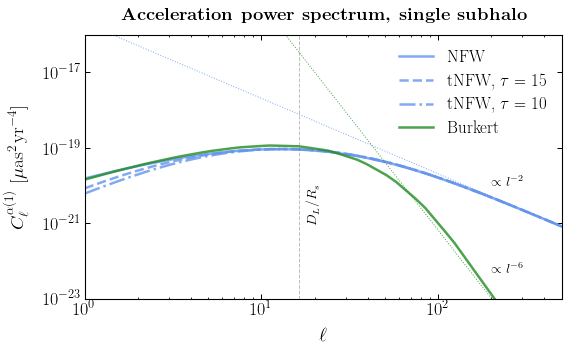

In [13]:
plt.figure(figsize=(8,5))

plt.plot(l_ary, pref*Cl_NFW_ary, label="NFW", alpha=0.8, c='cornflowerblue')
plt.plot(l_ary, pref*Cl_tNFW_ary, label="tNFW, $\\tau = 15$", alpha=0.8, ls='--', c='cornflowerblue')
plt.plot(l_ary, pref*Cl_tNFW2_ary, label="tNFW, $\\tau = 10$", alpha=0.8, ls='-.', c='cornflowerblue')
plt.plot(l_ary, pref*Cl_Burk_ary, label="Burkert", alpha=0.8,c='forestgreen')

n = 4 # is actually n + 2 
plt.plot(l_ary, (1/l_ary**n)*pref*Cl_NFW_ary[-1]/(1/(l_ary**n)[-1]), lw=1, alpha=0.8, ls='dotted', c='cornflowerblue')

n = 8 # is actually n + 2 
l_base = 2000
fac = pref*pspec.Cl_Burk(M0, Dl, v, l_base)/(1e-6*asctorad/Year)**2/(1/(l_base**n))
plt.plot(l_ary, (1/l_ary**n)*fac, lw=1, alpha=0.8, ls='dotted',c='forestgreen')

plt.text(200, 1e-20,'$\propto l^{-2}$', fontsize=14)
plt.text(200, 5e-23,'$\propto l^{-6}$', fontsize=14)

plt.axvline(1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl)) + 1.5,1e-21,'$D_L/R_s$',rotation=90, fontsize=14)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\\alpha (1)}$ [$\mu$as$^2$\,yr$^{-4}$]")


plt.xlim(l_min, 500)
plt.ylim(1e-23,1e-16)

plt.title('\\textbf{Acceleration power spectrum, single subhalo}', fontsize=18.5, y=1.02)

plt.legend(frameon=False)

plt.tight_layout()
plt.savefig(plots_dir + "alpha_single_2.pdf")